<a href="https://colab.research.google.com/github/prakayastha/Phonopy-Spectroscopy/blob/master/benzene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from scipy import constants, signal
from numpy import array, reshape, zeros, ones, linalg, identity, float64, append, sqrt, arange, newaxis, delete, sum
import copy, os, shutil
from sklearn import preprocessing
import numpy as np
import time
import sys
from pylab import figure
from pylab import savetxt, transpose, eig, argsort, sort, sign, pi, dot, sum, linspace, argmin, r_, convolve
def lorentz(pi,g,x):
    """
      Lorentzian function
    """
    x0 = (x.max()-x.min())-x.min()
    lr = ((g**2)/((x-0.5*x0)**2+g**2))
    return lr - lr.min()

broadening = 5

Text(0, 0.5, 'Intensity [a.u.]')

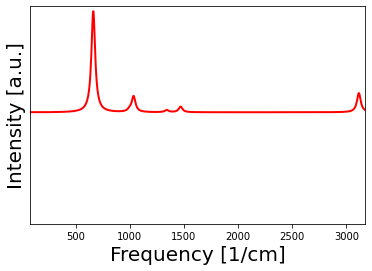

In [59]:
freq = np.array([-8.663247,-0.000053, 0.000018, 0.000029, 6.143597, 6.318212, 396.012626, 396.358891, 601.600563, 601.698033, 661.983599, 704.751636, 835.119472, 835.711240, 955.901133, 956.404500, 984.343029, 994.356405, 996.387446, 1035.219410, 1035.301336, 1139.748682, 1162.761387, 1162.926922, 1335.154784, 1340.085884, 1467.124707, 1467.288627, 1590.531373, 1590.714639, 3088.633274, 3098.112947, 3098.270202, 3112.422319, 3113.372277, 3122.915830])
infrared_intensity = np.array([0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.108995, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.002191, 0.016831, 0.016890, 0.000086, 0.000000, 0.000000, 0.000000, 0.002296, 0.005955, 0.006003, 0.000000, 0.000000, 0.000216, 0.000000, 0.000000, 0.020573, 0.020505, 0.000000])
x=linspace(freq.min()-500,freq.max()+500,1000)
z=zeros(len(x))
z2=zeros(len(x))

for i in range(len(freq)):
        z[argmin(abs(x-freq[i]))]=infrared_intensity[i]
window_len=150
lorentzian=lorentz(pi,broadening,arange(250))#signal.gaussian(window_len,broadening)
s=r_[z[window_len-1:0:-1],z,z[-1:-window_len:-1]]
z_convolve=convolve(lorentzian/lorentzian.sum(),s,mode='same')[window_len-1:-window_len+1]
fig=figure(0)
ax=fig.add_subplot(111)
ax.plot(x,z_convolve,'r',lw=2)
ax.set_xlim([freq.min()+90,freq.max()+50])
ax.set_ylim([-0.008,ax.get_ylim()[1]])
#ax.set_ylim([0,0.01])
ax.set_yticks([])
ax.set_xlabel('Frequency [1/cm]',size=20)
ax.set_ylabel('Intensity [a.u.]',size=20)

#fig.savefig(name+'_IR_spectrum.pdf')

Text(0, 0.5, 'Intensity [a.u.]')

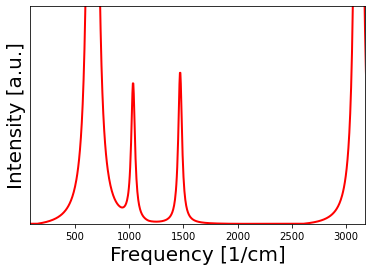

In [60]:
array1 = np.array([ 0.00000000 , 0.00000000 , 0.00000000 , 0.00000000 , 0.00000000 , 0.00000000 , 0.00000003 , 0.00000000 , 0.00000000 , 0.00000000 , 2.52923572 , 0.00000000 , 0.00000000 , 0.00000000 , 0.00000717 , 0.00000025 , 0.00000000 , 0.00000000 , 0.00000031 , 0.13325128 , 0.13283967 , 0.00000002 , 0.00000000 , 0.00000000 , 0.00000000 , 0.00000009 , 0.14714692 , 0.14689549 , 0.00000000 , 0.00000000 , 0.00062211 , 0.00000000 , 0.00000000 , 0.83870275 , 0.83801780 , 0.00000000  ])
norm = np.linalg.norm(array1)
normal_array = array1/norm
freq = np.array([-1.55300893,  -0.00138099,  -0.00104277,  -0.00091834,  1.51236314,  1.52279259,  396.19525496,  396.52268247,  601.63893704,  601.76653247,  662.95302337,  704.88067593,  835.35307943,  836.18641222,  956.45085660,  956.68605313,  984.75713952,  994.30673185,  996.44901802,  1035.26377363,  1035.37967877,  1139.86549942,  1162.84124705,  1162.99674859,  1335.31206439,  1340.04453586,  1467.18969605,  1467.48298386,  1590.57634054,  1590.68805872,  3088.40493949,  3097.77953175,  3098.16116190,  3111.99972120,  3113.39293086,  3122.68489043 ])
infrared_intensity = normal_array
x=linspace(freq.min()-500,freq.max()+500,1000)
z=zeros(len(x))
z2=zeros(len(x))

for i in range(len(freq)):
        z[argmin(abs(x-freq[i]))]=infrared_intensity[i]
window_len=150
lorentzian=lorentz(pi,broadening,arange(250))#signal.gaussian(window_len,broadening)
s=r_[z[window_len-1:0:-1],z,z[-1:-window_len:-1]]
z_convolve=convolve(lorentzian/lorentzian.sum(),s,mode='same')[window_len-1:-window_len+1]
fig=figure(0)
ax=fig.add_subplot(111)
ax.plot(x,z_convolve,'r',lw=2)
ax.set_xlim([freq.min()+90,freq.max()+50])
ax.set_ylim([-0.008,ax.get_ylim()[1]])
ax.set_ylim([0,0.005])
ax.set_yticks([])
ax.set_xlabel('Frequency [1/cm]',size=20)
ax.set_ylabel('Intensity [a.u.]',size=20)